In [1]:
import pandas as pd
import scanpy as sc

import plotnine
from plotnine import *

dpi=300

In [2]:
clustered_matrix=pd.read_csv('../data/Fig2E_Clustered_Matrix.csv', index_col=0)
df=pd.read_csv('../data/Fig2E_Random_Forest.csv', sep=',', index_col=0)
df=df[df.index != 'BAGE5']
selected_top_markers=df.iloc[0:30]

In [3]:
order_of_pathology=['PRES', 'EDAD', 'MDAD', 'ODAD']
path='/lustre/scratch126/cellgen/team283/tl7/project/nanostring-covid/data/20220202_WTA/'
sp_adata=sc.read_h5ad(f'{path}finalRun_geneProbeCounts_AnnData_CC-SimpleCorrected_Filtered_UKCIC-Lung_4Patho.h5ad')
sp_adata.obs['Pathology']=pd.Categorical(sp_adata.obs['Pathology'] , categories=order_of_pathology)

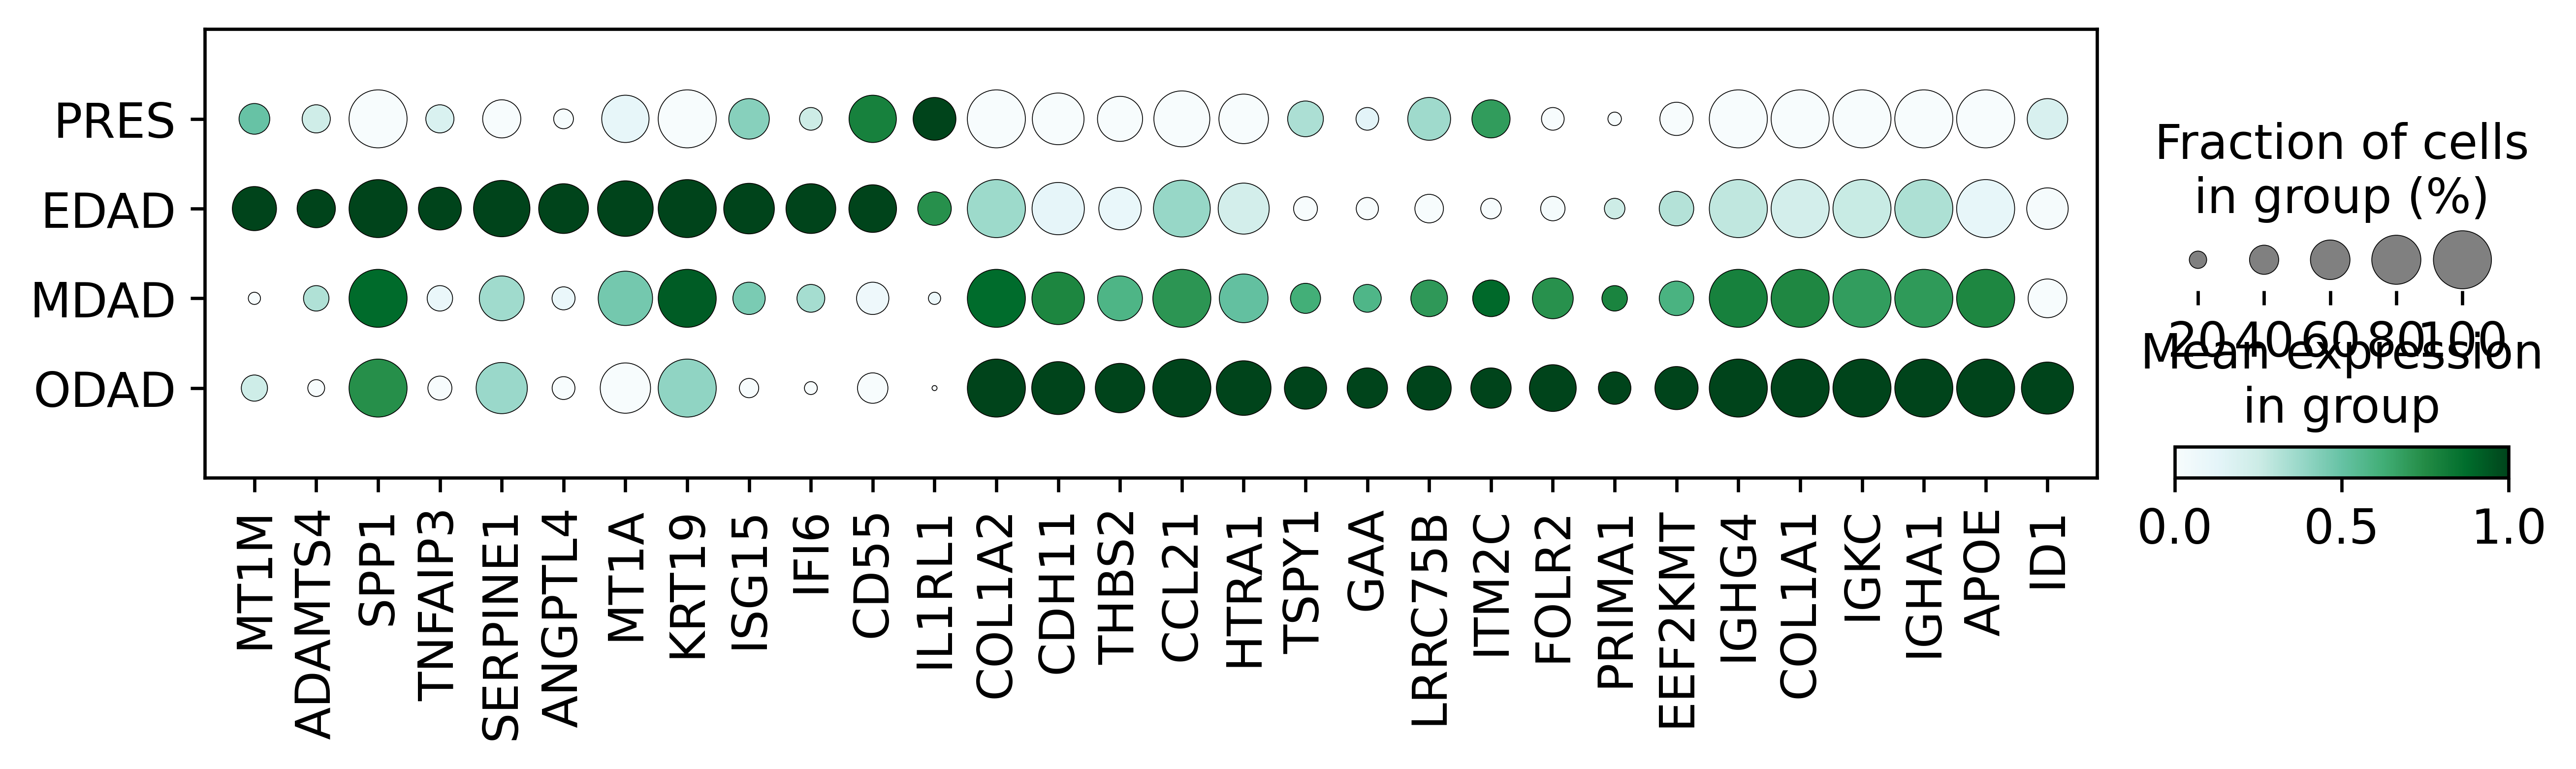

In [4]:
sc.set_figure_params(scanpy=True, fontsize=14, dpi=dpi) 

subset_features=clustered_matrix.columns[::-1]

sc.pl.dotplot(
    adata=sp_adata, 
    var_names=subset_features,
    groupby='Pathology', 
    categories_order=order_of_pathology, 
    swap_axes=False,
    standard_scale='var',
    dendrogram=False, 
    figsize=[10,2], 
    log=True, 
    layer='X_cc_corrected', 
    mean_only_expressed=False,
    cmap='BuGn'
)


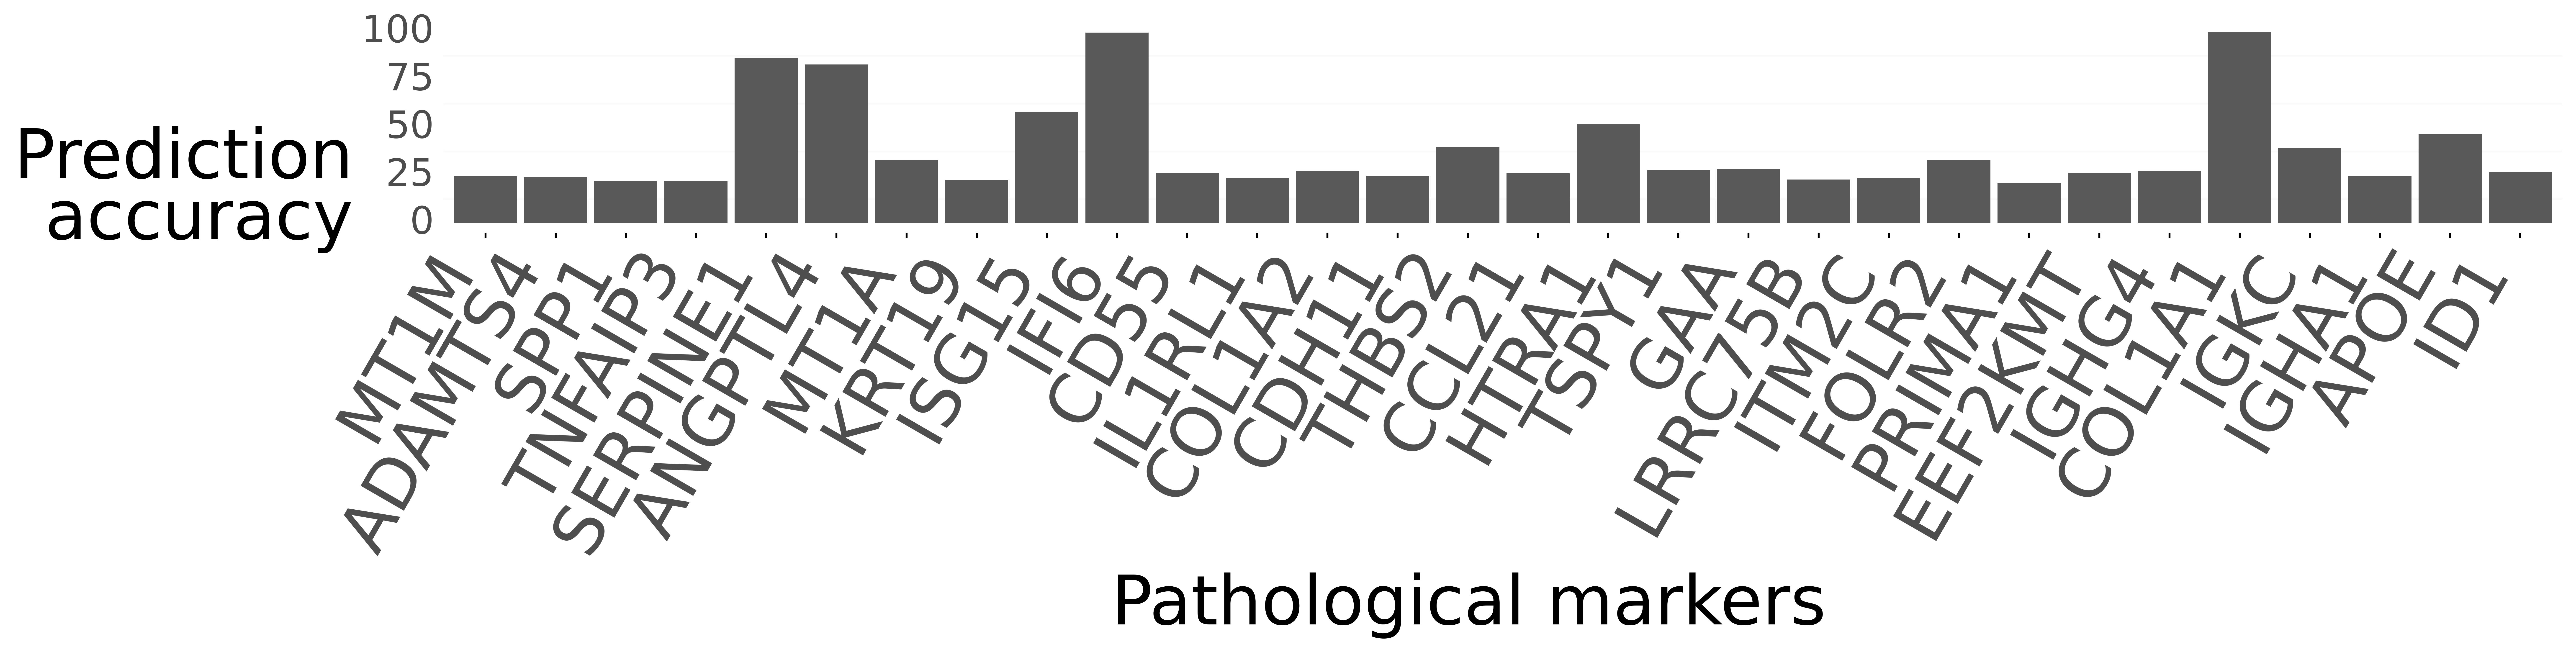

<ggplot: (8758192661465)>

In [5]:
p1=(
    ggplot() 
    + geom_col( 
        data=selected_top_markers, 
        mapping=aes( 
            x='reorder(selected_top_markers.index, -x)', 
            y='x')
    ) 
    + theme_bw() 
    + theme(
        axis_text_x=element_text(angle=60, vjust=1, hjust=1, size=36), 
        axis_text_y=element_text(size=20),
        axis_title_y=element_text(angle=0, vjust=1, hjust=1),
        title= element_text(size=36),
        panel_grid_major=element_blank(),
        panel_border=element_blank(),
        axis_ticks_major_y=element_blank(),
        figure_size=(20,2), 
        dpi=dpi,
        legend_position='none' 
    ) 
    + scale_x_discrete(limits=subset_features) 
    + labs(x='Pathological markers', y='Prediction\naccuracy')
)

# ggsave(p1, 'figures/fig2e.pdf', format='pdf')

p1